In [164]:
import pandas as pd


In [165]:
path = "COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
data = pd.read_csv(path)

In [166]:
data[data['Country/Region'] == 'Mainland China'].T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Province/State,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,...,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang
Country/Region,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,...,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China
Lat,31.8257,40.1824,30.0572,26.0778,36.0611,23.3384,23.8291,26.8154,19.1967,38.0428,...,35.1917,36.3438,31.2033,37.5777,30.6171,39.2936,30.1534,41.1198,24.9741,29.1825
Long,117.226,116.414,107.874,117.99,103.834,113.422,108.788,106.875,109.746,114.515,...,108.87,118.153,121.455,112.292,102.71,117.333,88.7879,85.1782,101.487,120.099
1/22/20,1,14,6,1,0,26,2,1,4,1,...,0,2,9,1,5,4,0,0,1,10
1/23/20,9,22,9,5,2,32,5,3,5,1,...,3,6,16,1,8,4,0,2,2,27
1/24/20,15,36,27,10,2,53,23,3,8,2,...,5,15,20,1,15,8,0,2,5,43
1/25/20,39,41,57,18,4,78,23,4,19,8,...,15,27,33,6,28,10,0,3,11,62
1/26/20,60,68,75,35,7,111,36,5,22,13,...,22,46,40,9,44,14,0,4,16,104
1/27/20,70,80,110,59,14,151,46,7,33,18,...,35,75,53,13,69,23,0,5,26,128


In [167]:
data_t = data.T

In [168]:
data_t.columns = data_t.iloc[1, :].astype(str) + '_' +  data_t.iloc[0, :].astype(str)

In [169]:
data_t = data_t.iloc[4:]

In [170]:
data_t = data_t.reset_index()

In [171]:
data_t['date'] = pd.to_datetime(data_t['index'])

In [172]:
data_t.columns = data_t.columns.str.replace(" ","_")
data_t.columns = data_t.columns.str.replace(",","_")

In [173]:
data_t = data_t.drop(['index', ], axis=1)

In [174]:
data_t = data_t.set_index('date')

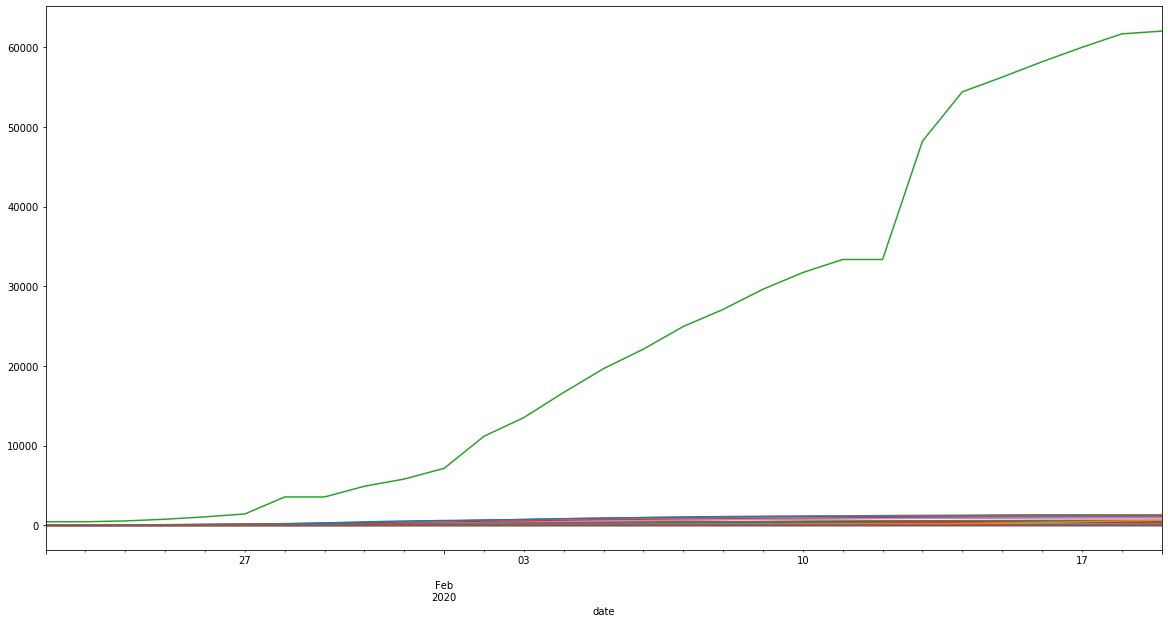

In [175]:
data_t.plot(legend=False, figsize=(20,10))

In [176]:
data_china = data[data['Country/Region'] == 'Mainland China'].T

In [177]:
data_china = data_china.sum(axis=1)

In [178]:
data_china = data_china.iloc[4:]
data_china = data_china.rename('China_total')

In [179]:
data_all= pd.concat([data_t, data_china], axis=1)

In [180]:
melted = pd.melt(data_all)

In [181]:
size = len(melted['variable'].unique())

In [182]:
index = ([data_all.index.to_list()] * size)

In [183]:
flat_index = [item for sublist in index for item in sublist]

In [184]:
full_df = pd.concat([melted, pd.DataFrame(flat_index, columns=['date'])], axis=1)

In [185]:
full_df.to_csv('corona_recovery_formated.csv', index=False)

In [186]:
full_df.head()

,variable,value,date
0,Mainland_China_Anhui,1,2020-01-22
1,Mainland_China_Anhui,9,2020-01-23
2,Mainland_China_Anhui,15,2020-01-24
3,Mainland_China_Anhui,39,2020-01-25
4,Mainland_China_Anhui,60,2020-01-26


In [195]:
china_total = full_df[full_df['variable'] == 'China_total']

In [196]:
china_total = china_total.set_index('date')

In [197]:
china_total

,variable,value
date,,
2020-01-22,China_total,547
2020-01-23,China_total,639
2020-01-24,China_total,916
2020-01-25,China_total,1399
2020-01-26,China_total,2062
2020-01-27,China_total,2863
2020-01-28,China_total,5494
2020-01-29,China_total,6070
2020-01-30,China_total,8124


In [204]:
hubei = full_df[full_df['variable'] == 'Mainland_China_Hubei']

In [205]:
hubei = hubei.set_index('date')

In [206]:
china_total['value'] = china_total['value'].astype(float)
hubei['value'] = hubei['value'].astype(float)

In [207]:
hubei['value'] 

date
2020-01-22      444.0
2020-01-23      444.0
2020-01-24      549.0
2020-01-25      761.0
2020-01-26     1058.0
2020-01-27     1423.0
2020-01-28     3554.0
2020-01-29     3554.0
2020-01-30     4903.0
2020-01-31     5806.0
2020-02-01     7153.0
2020-02-02    11177.0
2020-02-03    13522.0
2020-02-04    16678.0
2020-02-05    19665.0
2020-02-06    22112.0
2020-02-07    24953.0
2020-02-08    27100.0
2020-02-09    29631.0
2020-02-10    31728.0
2020-02-11    33366.0
2020-02-12    33366.0
2020-02-13    48206.0
2020-02-14    54406.0
2020-02-15    56249.0
2020-02-16    58182.0
2020-02-17    59989.0
2020-02-18    61682.0
2020-02-19    62031.0
Name: value, dtype: float64

In [208]:
china_total['value'] - hubei['value']

date
2020-01-22      103.0
2020-01-23      195.0
2020-01-24      367.0
2020-01-25      638.0
2020-01-26     1004.0
2020-01-27     1440.0
2020-01-28     1940.0
2020-01-29     2516.0
2020-01-30     3221.0
2020-01-31     3977.0
2020-02-01     4718.0
2020-02-02     5430.0
2020-02-03     6171.0
2020-02-04     7002.0
2020-02-05     7744.0
2020-02-06     8441.0
2020-02-07     9122.0
2020-02-08     9678.0
2020-02-09    10159.0
2020-02-10    10578.0
2020-02-11    10961.0
2020-02-12    11333.0
2020-02-13    11626.0
2020-02-14    11886.0
2020-02-15    12098.0
2020-02-16    12264.0
2020-02-17    12375.0
2020-02-18    12457.0
2020-02-19    12515.0
Name: value, dtype: float64

## Model sigmoid

In [158]:
import matplotlib.pyplot as plt

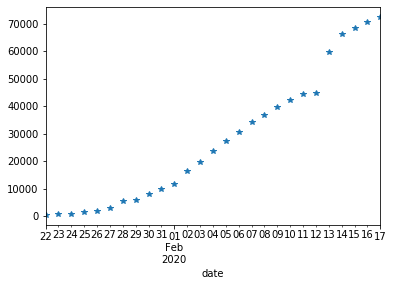

In [159]:
china_total['value'].plot(style='*')

In [82]:
import numpy as np

In [124]:
range_days = 100

In [125]:
X_test = np.linspace(-range_days, range_days, 2*range_days+1)

In [127]:
def sigmoid(X, lambda_t):
    return 1 / (1 + np.exp(-lambda_t * X))

In [130]:
sig = sigmoid(X_test, 0.08) * 100000

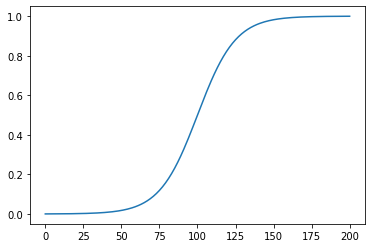

In [131]:
plt.plot(sig)

## Population region china

In [58]:
pop = pd.read_csv('/Users/roger/Projects/coronavirus/Sales_Forecast/data/population_china.csv', sep='	', thousands=',')

In [59]:
pop

,Region,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Beijing,30319.98,28014.94,25669.13,23014.59,21330.83,19800.81,17879.40,16251.93,14113.58,12153.03
1,Tianjin,18809.64,18549.19,17885.39,16538.19,15726.93,14442.01,12893.88,11307.28,9224.46,7521.85
2,Hebei,36010.27,34016.32,32070.45,29806.11,29421.15,28442.95,26575.01,24515.76,20394.26,17235.48
3,Shanxi,16818.11,15528.42,13050.41,12766.49,12761.49,12665.25,12112.83,11237.55,9200.86,7358.31
4,Inner Mongolia,17289.22,16096.21,18128.10,17831.51,17770.19,16916.50,15880.58,14359.88,11672.00,9740.25
5,Liaoning,25315.35,23409.24,22246.90,28669.02,28626.58,27213.22,24846.43,22226.70,18457.27,15212.49
6,Jilin,15074.62,14944.53,14776.80,14063.13,13803.14,13046.40,11939.24,10568.83,8667.58,7278.75
7,Heilongjiang,16361.62,15902.68,15386.09,15083.67,15039.38,14454.91,13691.58,12582.00,10368.60,8587.00
8,Shanghai,32679.87,30632.99,28178.65,25123.45,23567.70,21818.15,20181.72,19195.69,17165.98,15046.45
9,Jiangsu,92595.40,85869.76,77388.28,70116.38,65088.32,59753.37,54058.22,49110.27,41425.48,34457.30


In [60]:
pop = pop[['Region', '2018']]

In [61]:
pop.columns = ['Region', 'population']

In [62]:
china = data_t.columns[data_t.columns.str.startswith('Mainland_China')]
list_of_region = china.str.split('_', expand=True).to_list()
regions = [i[2] for i in list_of_region]

In [63]:
china_data = data_t[china]

In [64]:
regions[14] = 'Inner Mongolia'

In [65]:
china_data.columns = regions

In [66]:
for region in regions:
    china_data[region] = china_data[region]/ pop[pop['Region'] == region]['population'].values[0]

/Users/roger/Projects/coronavirus/Sales_Forecast/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
china_data

,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,...,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,3.33258e-05,0.000461742,0.000294649,2.79298e-05,0,0.000267276,9.8268e-05,6.75381e-05,0.000827806,2.77699e-05,...,0,2.61542e-05,0.000275399,5.94597e-05,0.000122916,0.000212657,0,0,5.59249e-05,0.000177945
2020-01-23,0.000299932,0.000725594,0.000441974,0.000139649,0.00024254,0.000328955,0.00024567,0.000202614,0.00103476,2.77699e-05,...,0.000122758,7.84625e-05,0.000489598,5.94597e-05,0.000196666,0.000212657,0,0.000163947,0.00011185,0.000480451
2020-01-24,0.000499886,0.00118734,0.00132592,0.000279298,0.00024254,0.000544832,0.00113008,0.000202614,0.00165561,5.55397e-05,...,0.000204597,0.000196156,0.000611998,5.94597e-05,0.000368749,0.000425314,0,0.000163947,0.000279625,0.000765163
2020-01-25,0.0012997,0.00135224,0.00279917,0.000502737,0.00048508,0.000801828,0.00113008,0.000270153,0.00393208,0.000222159,...,0.00061379,0.000353081,0.0010098,0.000356758,0.000688331,0.000531642,0,0.00024592,0.000615174,0.00110326
2020-01-26,0.00199955,0.00224275,0.00368312,0.000977543,0.000848889,0.00114106,0.00176882,0.000337691,0.00455293,0.000361008,...,0.000900226,0.000601546,0.001224,0.000535137,0.00108166,0.000744299,0,0.000327894,0.000894799,0.00185063
2020-01-27,0.0023328,0.00263852,0.0054019,0.00164786,0.00169778,0.00155226,0.00226016,0.000472767,0.0068294,0.000499857,...,0.00143218,0.000980781,0.00162179,0.000772976,0.00169624,0.00122278,0,0.000409867,0.00145405,0.0022777
2020-01-28,0.00353253,0.00300132,0.00648228,0.00223438,0.00230413,0.00212793,0.00250583,0.000607843,0.00827806,0.000916405,...,0.00188229,0.00124232,0.00201959,0.00160541,0.00221249,0.00127594,0,0.000819734,0.0024607,0.00307845
2020-01-29,0.00506552,0.00366095,0.00721891,0.0023461,0.00291048,0.00284752,0.00284977,0.000607843,0.00889891,0.00133295,...,0.00229148,0.00170002,0.00293759,0.00160541,0.00265499,0.00143543,0,0.00106565,0.00307587,0.00526717
2020-01-30,0.00666515,0.0037599,0.0089377,0.00282091,0.00315302,0.00363906,0.00383245,0.000810458,0.00951977,0.00180504,...,0.00257792,0.00206618,0.00342719,0.00208109,0.00349082,0.00164809,0.000676759,0.00114763,0.00391474,0.00761604


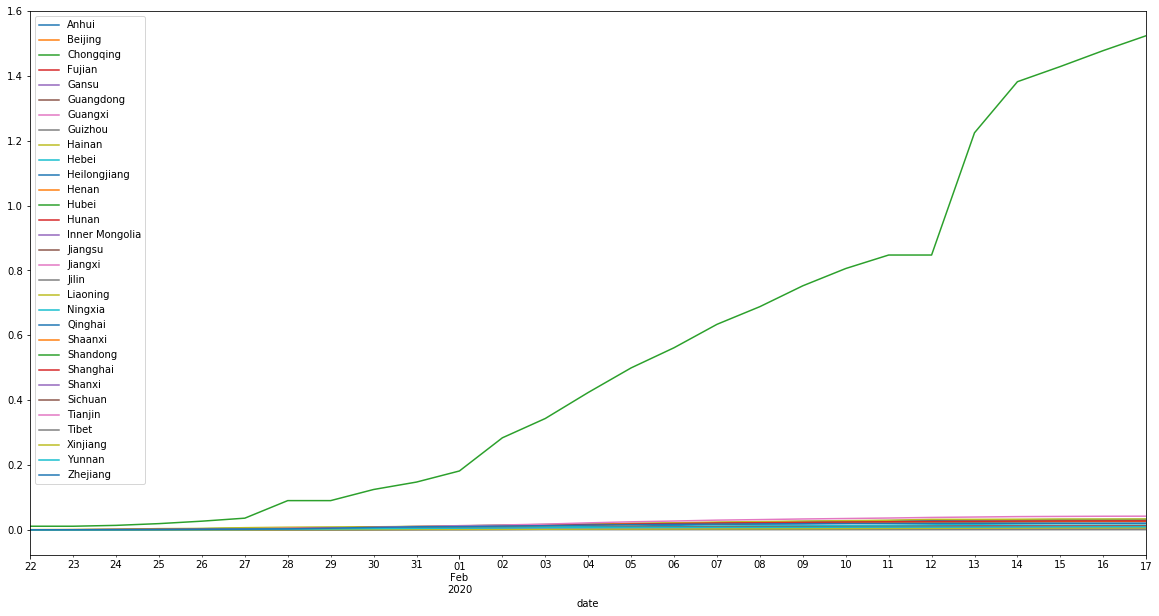

In [68]:
china_data.plot(legend=True, figsize=(20,10))

In [43]:
china_data.to_csv('china_data.csv')